# *fiasco*: Testing the Package--Read Tests
Test parsing capabilities of the fiasco package for all CHIANTI filetypes

In [47]:
import os
import h5py
import numpy as np
#import pandas
import astropy.units as u
from astropy.utils.console import ProgressBar
import fiasco.io
import matplotlib.pyplot as plt
import fortranformat
import ChiantiPy.tools.io as ch_io

%matplotlib inline

Collect all of the needed data files

In [12]:
skip_dirs = ['abundance','ip','ancillary_data','continuum','dem','ioneq','masterlist']
all_files = []
for topdir,subdir,files in os.walk(fiasco.defaults['chianti_dbase_root']):
    if np.any([sd in topdir for sd in skip_dirs]):
        continue
    if topdir == fiasco.defaults['chianti_dbase_root']:
        continue
    files = [file for file in files if file[0] != '.']
    all_files += files

## Elvlc Read Tests

In [3]:
elvlc_files = [file for file in all_files if os.path.splitext(file)[1] == '.elvlc']

In [ ]:
failed_files = []
for ef in elvlc_files:
    parser = fiasco.io.Parser(ef)
    try:
        df = parser.parse()
    except:
        print('Parse failed for file {}'.format(ef))
        failed_files.append(ef)
print('failure percentage: {}'.format(len(failed_files)/len(elvlc_files)*100))

In [4]:
parser = fiasco.io.Parser(elvlc_files[0])
df = parser.parse()
print(df)
print('---Metadata---')
for key in df.meta:
    print('{}:{}'.format(key,df.meta[key]))

level index configuration level label ... observed energy theoretical energy
                                      ...      1 / cm           1 / cm      
----------- ------------- ----------- ... --------------- ------------------
          1           2s2             ...             0.0                0.0
          2         2s.2p             ...        155148.0         156208.875
          3         2s.2p             ...        156798.0         157871.391
          4         2s.2p             ...        160429.0         161524.547
          5         2s.2p             ...        300490.0         314297.531
          6           2p2             ...        404574.0         407449.156
          7           2p2             ...        406517.0         409368.438
          8           2p2             ...        409690.0         412555.219
          9           2p2             ...        449732.0         460884.656
         10           2p2             ...        553783.0         569392.938

## Fblvl Read Tests

In [5]:
fblvl_files = [file for file in all_files if os.path.splitext(file)[1] == '.fblvl']

In [ ]:
failed_files = []
for ef in fblvl_files:
    parser = fiasco.io.Parser(ef)
    try:
        df = parser.parse()
    except:
        print('Parse failed for file {}'.format(ef))
        failed_files.append(ef)
print('failure percentage: {}'.format(len(failed_files)/len(fblvl_files)*100))

In [6]:
parser = fiasco.io.Parser(fblvl_files[0])
df = parser.parse()
print(df)
print('---Metadata---')
for key in df.meta:
    print('{}:{}'.format(key,df.meta[key]))

level index configuration ... observed energy theoretical energy
                          ...      1 / cm           1 / cm      
----------- ------------- ... --------------- ------------------
          1         3s23p ...          74.707                0.0
          2         3s23d ...       32436.259                0.0
          3         3s24s ...       25347.756                0.0
          4         3s24p ...       32960.363                0.0
          5         3s24d ...       42236.166                0.0
          6         3s24f ...       41319.395                0.0
          7         3s25s ...       37689.406                0.0
          8         3s25p ...       40275.914                0.0
          9         3s25d ...       44167.868                0.0
         10         3s25f ...       43831.104                0.0
         11         3s25g ...        43875.75                0.0
---Metadata---
footer:%filename: al_1.fblvl
%energy levels: NIST Atomic Spectra Database V

## Scups Read Tests

In [7]:
scups_files = [file for file in all_files if os.path.splitext(file)[1] == '.scups']

In [ ]:
failed_files = []
with ProgressBar(len(scups_files),ipython_widget=True) as progress:
    for ef in scups_files:
        parser = fiasco.io.Parser(ef)
        try:
            df = parser.parse()
        except:
            print('Parse failed for file {}'.format(ef))
            failed_files.append(ef)
        progress.update()
print('failure percentage: {}'.format(len(failed_files)/len(scups_files)*100))

In [8]:
parser = fiasco.io.Parser(scups_files[0])
df = parser.parse()
print(df)
print('---Metadata---')
for key in df.meta:
    print('{}:{}'.format(key,df.meta[key]))

lower level index ...
                  ...
----------------- ...
                1 ...
                1 ...
                1 ...
                1 ...
                1 ...
                1 ...
                1 ...
                1 ...
                1 ...
                2 ...
              ... ...
                6 ...
                6 ...
                6 ...
                6 ...
                7 ...
                7 ...
                7 ...
                8 ...
                8 ...
                9 ...
Length = 43 rows
---Metadata---
footer:%filename: al_10.splups
%Effective collision strengths: Keenan et al., 1986, Physica Scripta 34, 216
%Allowed transitions oscillator strengths: Zhang, Sampson, ADNDT, 1992 , 52, 143
%comment: Have derived the upsilon data from Table V of Keenan et al.
   The Delta-E's have been taken from the observed values in the .elvlc
   file. The gf values are from the .wgfa file.
   The upsilons have been created for logT=6.1+-0.8 in 0.1 de

## Psplups Read Tests

In [9]:
psplups_files = [file for file in all_files if os.path.splitext(file)[1] == '.psplups']

In [ ]:
failed_files = []
with ProgressBar(len(psplups_files),ipython_widget=True) as progress:
    for ef in psplups_files:
        parser = fiasco.io.Parser(ef)
        try:
            df = parser.parse()
        except:
            print('Parse failed for file {}'.format(ef))
            failed_files.append(ef)
        progress.update()
print('failure percentage: {}'.format(len(failed_files)/len(psplups_files)*100))

In [10]:
parser = fiasco.io.Parser(psplups_files[0])
df = parser.parse()
print(df)
print('---Metadata---')
for key in df.meta:
    print('{}:{}'.format(key,df.meta[key]))

lower level index ... Burgess-Tully scaled effective collision strengths [9]
                  ...                                                       
----------------- ... ------------------------------------------------------
                2 ...                                  4.57e-14 .. 1.667e-12
                2 ...                                 5.603e-12 .. 2.986e-10
                3 ...                                 1.582e-11 .. 2.293e-10
---Metadata---
footer:%filename: al_10.psplups
%rates: Ryans R.S.I., Foster-Woods V.J, Copeland F., Keenan F.P., Matthews A., Reid R.H.G., 1998, ADNDT 70, 179-229
%energies: Martin W.C., Sugar J., Musgrove A., Dalton G.R., 1995, NIST Database for Atomic Spectroscopy, 
   Version 1.0, NIST Standard Reference Database 61.
%comment: Fits valid for temperatures 2e5 to 5e7 K.
%produced as part of the Arcetri/Cambridge/NRL 'CHIANTI' atomic data base collaboration
%
% Peter Young, 19-Oct-00
 -1

chianti_version:8.0.2
element:al
ion:al_10


## Easplom Read Tests

In [11]:
easplom_files = [file for file in all_files if os.path.splitext(file)[1] == '.easplom']

In [ ]:
failed_files = []
with ProgressBar(len(easplom_files),ipython_widget=True) as progress:
    for ef in easplom_files:
        parser = fiasco.io.Parser(ef)
        try:
            df = parser.parse()
        except:
            print('Parse failed for file {}'.format(ef))
            failed_files.append(ef)
        progress.update()
print('failure percentage: {}'.format(len(failed_files)/len(easplom_files)*100))

In [12]:
parser = fiasco.io.Parser(easplom_files[0])
df = parser.parse()
print(df)
print('---Metadata---')
for key in df.meta:
    print('{}:{}'.format(key,df.meta[key]))

lower level index upper level index ... Burgess-Tully scaled cross-section [5]
                                    ...                                       
----------------- ----------------- ... --------------------------------------
                1                 3 ...                     0.01324 .. 0.01838
                1                 4 ...                   0.004166 .. 0.003772
---Metadata---
footer:%file:  al_10.easplom
%excitation autoionization cross section parameter file
 derived from fits to experimental and theoretical data
Dere, K. P., 2007, A&A, 466, 771
ADS ref:  http://adsabs.harvard.edu/abs/2007A%26A...466..771D
 created for CHIANTI database for astrophysical spectroscopy
  created by Ken Dere  (GMU)  Fri Jan 26 12:40:27 2007
-1

chianti_version:8.0.2
element:al
ion:al_10


## Easplups Read Tests

In [13]:
easplups_files = [file for file in all_files if os.path.splitext(file)[1] == '.easplups']

In [ ]:
failed_files = []
with ProgressBar(len(easplups_files),ipython_widget=True) as progress:
    for ef in easplups_files:
        parser = fiasco.io.Parser(ef)
        try:
            df = parser.parse()
        except:
            print('Parse failed for file {}'.format(ef))
            failed_files.append(ef)
        progress.update()
print('failure percentage: {}'.format(len(failed_files)/len(easplups_files)*100))

In [14]:
parser = fiasco.io.Parser(easplups_files[0])
df = parser.parse()
print(df)
print('---Metadata---')
for key in df.meta:
    print('{}:{}'.format(key,df.meta[key]))

lower level index ... excitation-autoionization rate coefficients [5]
                  ...                                                
----------------- ... -----------------------------------------------
                1 ...                              0.01324 .. 0.01838
                1 ...                            0.004166 .. 0.003772
---Metadata---
footer:%file:  al_10.easplups
%excitation autoionization rate coefficient parameter file
 derived from fits to experimental and theoretical data
Dere, K. P., 2007, A&A, 466, 771
ADS ref:  http://adsabs.harvard.edu/abs/2007A%26A...466..771D
 created for CHIANTI database for astrophysical spectroscopy
  created by Ken Dere  (GMU)  Fri Jan 26 12:40:27 2007
-1

chianti_version:8.0.2
element:al
ion:al_10


## Wgfa Read Tests

In [15]:
wgfa_files = [file for file in all_files if os.path.splitext(file)[1] == '.wgfa']

In [ ]:
failed_files = []
with ProgressBar(len(wgfa_files),ipython_widget=True) as progress:
    for ef in wgfa_files:
        parser = fiasco.io.Parser(ef)
        try:
            df = parser.parse()
        except:
            print('Parse failed for file {}'.format(ef))
            failed_files.append(ef)
        progress.update()
print('failure percentage: {}'.format(len(failed_files)/len(wgfa_files)*100))

In [16]:
parser = fiasco.io.Parser(wgfa_files[0])
df = parser.parse()
print(df)
print('---Metadata---')
for key in df.meta:
    print('{}:{}'.format(key,df.meta[key]))

lower level index upper level index ... lower level label upper level label
                                    ...                                    
----------------- ----------------- ... ----------------- -----------------
                1                 3 ...           2s2 1S0         2s.2p 3P1
                1                 4 ...           2s2 1S0         2s.2p 3P2
                1                 5 ...           2s2 1S0         2s.2p 1P1
                2                 7 ...         2s.2p 3P0           2p2 3P1
                3                 4 ...         2s.2p 3P1         2s.2p 3P2
                3                 6 ...         2s.2p 3P1           2p2 3P0
                3                 7 ...         2s.2p 3P1           2p2 3P1
                3                 8 ...         2s.2p 3P1           2p2 3P2
                3                 9 ...         2s.2p 3P1           2p2 1D2
                3                10 ...         2s.2p 3P1           2p2 1S0
            

## Cilvl Read Tests

In [17]:
cilvl_files = [file for file in all_files if os.path.splitext(file)[1] == '.cilvl']

In [ ]:
failed_files = []
with ProgressBar(len(cilvl_files),ipython_widget=True) as progress:
    for ef in cilvl_files:
        parser = fiasco.io.Parser(ef)
        try:
            df = parser.parse()
        except:
            print('Parse failed for file {}'.format(ef))
            failed_files.append(ef)
        progress.update()
print('failure percentage: {}'.format(len(failed_files)/len(cilvl_files)*100))

In [18]:
parser = fiasco.io.Parser(cilvl_files[0])
df = parser.parse()
print(df)
print('---Metadata---')
for key in df.meta:
    print('{}:{}'.format(key,df.meta[key]))

lower level index upper level index ... ionization rate coefficient [9]
                                    ...             cm3 / s            
----------------- ----------------- ... -------------------------------
                1                 2 ...            1.05e-16 .. 4.18e-11
                1                 3 ...             6.13e-17 .. 2.5e-11
                1                 4 ...            1.88e-17 .. 8.55e-12
                1                 5 ...            5.27e-17 .. 2.44e-11
                1                 6 ...            1.11e-18 .. 5.95e-13
                1                 7 ...            6.57e-25 .. 1.53e-19
                1                 8 ...            7.06e-25 .. 1.69e-19
                1                 9 ...               6.95e-19 .. 4e-13
                1                10 ...            4.94e-25 .. 1.22e-19
                1                11 ...            6.17e-19 .. 3.83e-13
              ...               ... ...                         

## Reclvl Read Tests

In [19]:
reclvl_files = [file for file in all_files if os.path.splitext(file)[1] == '.reclvl']

In [ ]:
failed_files = []
with ProgressBar(len(reclvl_files),ipython_widget=True) as progress:
    for ef in reclvl_files:
        parser = fiasco.io.Parser(ef)
        try:
            df = parser.parse()
        except:
            print('Parse failed for file {}'.format(ef))
            failed_files.append(ef)
        progress.update()
print('failure percentage: {}'.format(len(failed_files)/len(reclvl_files)*100))

In [20]:
parser = fiasco.io.Parser(reclvl_files[0])
df = parser.parse()
print(df)
print('---Metadata---')
for key in df.meta:
    print('{}:{}'.format(key,df.meta[key]))

lower level index upper level index ... recombination rate coefficient [19]
                                    ...               cm3 / s              
----------------- ----------------- ... -----------------------------------
                1                 1 ...                8.81e-12 .. 7.18e-16
                1                 2 ...                8.42e-12 .. 7.77e-17
                1                 3 ...                1.68e-11 .. 1.55e-16
                1                 4 ...                2.75e-12 .. 2.09e-16
                1                 5 ...                 3.1e-12 .. 2.79e-17
                1                 6 ...                6.17e-12 .. 5.58e-17
                1                 7 ...                4.09e-12 .. 8.82e-18
                1                 8 ...                6.12e-12 .. 1.32e-17
                1                 9 ...                1.24e-12 .. 8.75e-17
                1                10 ...                1.46e-12 .. 1.26e-17
            

## Rrparams Read Tests

In [21]:
rrparams_files = [file for file in all_files if os.path.splitext(file)[1] == '.rrparams']

In [ ]:
failed_files = []
with ProgressBar(len(rrparams_files),ipython_widget=True) as progress:
    for ef in rrparams_files:
        parser = fiasco.io.Parser(ef)
        try:
            df = parser.parse()
        except:
            print('Parse failed for file {}'.format(ef))
            failed_files.append(ef)
        progress.update()
print('failure percentage: {}'.format(len(failed_files)/len(rrparams_files)*100))

In [22]:
parser = fiasco.io.Parser(rrparams_files[0])
df = parser.parse()
print(df)
print('---Metadata---')
for key in df.meta:
    print('{}:{}'.format(key,df.meta[key]))

fit type A fit parameter B fit parameter T0 fit parameter T1 fit parameter
             cm3 / s                            K                K        
-------- --------------- --------------- ---------------- ----------------
       1       1.578e-09          0.7394            61.57       14270000.0
---Metadata---
footer:%file:  al_10.rrparams
 Radiative recombination coefficients
Badnell, N. R., 2006, ApJS, 167, 334
http://adsabs.harvard.edu/abs/2006ApJS..167..334B
Radiative Recombination Data for Modeling Dynamic Finite-Density Plasmas
 produced for the CHIANTI atomic database for astrophysical spectroscopy
 created by Ken Dere (GMU):  Wed Feb 15 11:06:20 2012
-1

chianti_version:8.0.2
element:al
ion:al_10


## Trparams Read Tests

In [23]:
trparams_files = [file for file in all_files if os.path.splitext(file)[1] == '.trparams']

In [ ]:
failed_files = []
with ProgressBar(len(trparams_files),ipython_widget=True) as progress:
    for ef in trparams_files:
        parser = fiasco.io.Parser(ef)
        try:
            df = parser.parse()
        except:
            print('Parse failed for file {}'.format(ef))
            failed_files.append(ef)
        progress.update()
print('failure percentage: {}'.format(len(failed_files)/len(trparams_files)*100))

In [24]:
parser = fiasco.io.Parser(trparams_files[0])
df = parser.parse()
print(df)
print('---Metadata---')
for key in df.meta:
    print('{}:{}'.format(key,df.meta[key]))

temperature  total recombination rate
     K               cm3 / s         
------------ ------------------------
        10.0                 3.48e-11
       12.59                 3.14e-11
       15.85                 2.84e-11
       19.95                 2.58e-11
       25.12                 2.33e-11
       31.62                 2.09e-11
       39.81                 1.87e-11
       50.12                 1.67e-11
        63.1                 1.48e-11
       79.43                 1.31e-11
         ...                      ...
   1585000.0                 2.03e-13
   1995000.0                 1.45e-13
   2512000.0                 1.04e-13
   3162000.0                 7.38e-14
   3981000.0                 5.26e-14
   5012000.0                 3.74e-14
   6310000.0                 2.66e-14
   7943000.0                  1.9e-14
  10000000.0                 1.35e-14
1000000000.0                 1.35e-17
Length = 62 rows
---Metadata---
footer:%file:  fe_2.trparams
%total recombination rate c

## Diparams Read Test

The `.diparams` files have a variable format depending on what ion you're looking at. Need to parse the first row to find out exactly what the structure is.

In [105]:
diparams_files = [file for file in all_files if os.path.splitext(file)[1] == '.diparams']

In [106]:
failed_files = []
with ProgressBar(len(diparams_files),ipython_widget=True) as progress:
    for ef in diparams_files:
        parser = fiasco.io.Parser(ef)
        try:
            df = parser.parse()
        except:
            print('Parse failed for file {}'.format(ef))
            failed_files.append(ef)
        progress.update()
print('failure percentage: {}'.format(len(failed_files)/len(diparams_files)*100))

The installed widget Javascript is the wrong version. It must satisfy the semver range ~2.1.4.



failure percentage: 0.0


In [104]:
class TestDiparamsParser(fiasco.io.GenericParser):
    filetype='diparams'
    dtypes = [float,float,float,float]
    units = [1/u.cm,u.dimensionless_unscaled,u.dimensionless_unscaled,u.dimensionless_unscaled]
    headings = ['ionization potential','Burgess-Tully scaling factor','scaled energy','scaled cross-section']
    
    def preprocessor(self,table,line,index):
        tmp = line.strip().split()
        if index == 0:
            self._num_fits = int(tmp[2])
            self._num_lines = int(tmp[3])
            self._has_excitation_autoionization = bool(int(tmp[4]))
        elif index==self._num_lines*2 + 1 and self._has_excitation_autoionization:
            # read eaev
            self._excitation_autoionization = float(tmp[0])
        elif index%2 != 0:
            bt_factor = tmp[0]
            u_spline = np.array(tmp[1:],dtype=float)
            table.append([bt_factor,u_spline])
        else:
            ionization_potential = tmp[0]
            cs_spline = np.array(tmp[1:],dtype=float)
            table[-1] = [ionization_potential]+table[-1]+[cs_spline]
            
    def postprocessor(self,df):
        if hasattr(self,'_excitation_autoionization'):
            df['excitation autoionization'] = len(df['ionization potential'])*[self._excitation_autoionization]
        return df

## Drparams Read Test

In [147]:
drparams_files = [file for file in all_files if os.path.splitext(file)[1] == '.drparams']

In [148]:
failed_files = []
with ProgressBar(len(drparams_files),ipython_widget=True) as progress:
    for ef in drparams_files:
        parser = fiasco.io.Parser(ef)
        try:
            df = parser.parse()
        except:
            print('Parse failed for file {}'.format(ef))
            failed_files.append(ef)
        progress.update()
print('failure percentage: {}'.format(len(failed_files)/len(drparams_files)*100))

The installed widget Javascript is the wrong version. It must satisfy the semver range ~2.1.4.



failure percentage: 0.0


In [111]:
for drf in drparams_files:
    with open(os.path.join(fiasco.defaults['chianti_dbase_root'],drf.split('_')[0],drf.split('.')[0],drf),'r') as f:
        lines = f.readlines()
    print(drf)
    print(lines[0].strip())

al_10.drparams
1
al_11.drparams
1
al_12.drparams
1
al_13.drparams
1
al_2.drparams
1
al_3.drparams
1
al_4.drparams
1
al_5.drparams
1
al_6.drparams
1
al_7.drparams
1
al_8.drparams
1
al_9.drparams
1
ar_10.drparams
1
ar_11.drparams
1
ar_12.drparams
1
ar_13.drparams
1
ar_14.drparams
1
ar_15.drparams
1
ar_16.drparams
1
ar_17.drparams
1
ar_18.drparams
1
ar_2.drparams
2
ar_3.drparams
2
ar_4.drparams
2
ar_5.drparams
2
ar_6.drparams
1
ar_7.drparams
1
ar_8.drparams
1
ar_9.drparams
1
b_2.drparams
1
b_3.drparams
1
b_4.drparams
1
b_5.drparams
1
be_2.drparams
1
be_3.drparams
1
be_4.drparams
1
c_2.drparams
1
c_3.drparams
1
c_4.drparams
1
c_5.drparams
1
c_6.drparams
1
ca_10.drparams
1
ca_11.drparams
1
ca_12.drparams
1
ca_13.drparams
1
ca_14.drparams
1
ca_15.drparams
1
ca_16.drparams
1
ca_17.drparams
1
ca_18.drparams
1
ca_19.drparams
1
ca_2.drparams
2
ca_20.drparams
1
ca_3.drparams
1
ca_4.drparams
2
ca_5.drparams
2
ca_6.drparams
2
ca_7.drparams
2
ca_8.drparams
1
ca_9.drparams
1
cl_10.drparams
1
cl_11.dr

In [112]:
%%bash
head -n 30 $XUVTOP/ar/ar_2/ar_2.drparams

    2
   18    2  1.0000e-03  5.0000e-03  3.2000e+05  3.1000e+05
-1
%file:  ar_2.drparams
%parameters for dielectronic recombination rate coefficients
%reference:  Shull,J. M., VanSteenberg, M., 1982, ApJSS, 48, 95
 produced for the CHIANTI atomic database for astrophysical spectroscopy
 created by Ken Dere (GMU):  Wed Sep 24 12:54:25 2008
-1


In [10]:
%%bash
head -n 30 $XUVTOP/al/al_12/al_12.drparams

    1
   13   12  1.3360e+07  1.6890e+07  2.0910e+07  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   13   12  4.0930e-02  1.6180e-01  1.3320e-02  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
-1
%file:  al_12.drparams
%parameters for dielectronic recombination rate coefficients
Bautista, M.A., Badnell, N.R., 2007, A&A, 466, 755
Dielectronic recombination data for dynamic finite-density plasmas. XII. The helium isoelectronic sequence
http://cdsads.u-strasbg.fr/cgi-bin/bib_query?2007A%26A...466..755B
 produced for the CHIANTI atomic database for astrophysical spectroscopy
 created by Ken Dere (GMU):  Wed Feb 15 11:09:28 2012
-1


In [125]:
class TestDrparamsParser(fiasco.io.GenericParser):
    filetype = 'drparams'
    
    def preprocessor(self,table,line,index):
        line = line.strip().split()
        if index == 0:
            self._drparams_filetype = int(line[0])
            if self._drparams_filetype == 1:
                # Badnell type
                self.dtypes = [float,float]
                self.units = [u.K,(u.cm**3)/u.s*(u.K**(3/2))]
                self.headings = ['E fit parameter','c fit parameter']
            elif self._drparams_filetype == 2:
                # Shull type
                self.dtypes = [float,float,float,float]
                self.units = [(u.cm**3)/u.s*(u.K**(3/2)),u.dimensionless_unscaled,u.K,u.K]
                self.headings = ['A fit coefficient','B fit coefficient',
                                 'T0 fit coefficient','T1 fit coefficient']
            else:
                raise ValueError('Unrecognized drparams filetype {}'.format(self._drparams_filetype))
        else:
            if self._drparams_filetype == 1:
                tmp = np.array(line[2:],dtype=float)
                if index%2 == 0:
                    table[-1].append(tmp)
                else:
                    table.append([tmp])
            else:
                table.append(line[2:])

In [149]:
fiasco.io.Parser('ar_2.drparams').parse().meta

OrderedDict([('footer',
              '%file:  ar_2.drparams\n%parameters for dielectronic recombination rate coefficients\n%reference:  Shull,J. M., VanSteenberg, M., 1982, ApJSS, 48, 95\n produced for the CHIANTI atomic database for astrophysical spectroscopy\n created by Ken Dere (GMU):  Wed Sep 24 12:54:25 2008\n-1\n'),
             ('chianti_version', '8.0.2'),
             ('element', 'ar'),
             ('ion', 'ar_2')])

In [130]:
foo = fiasco.io.Parser('ar_14.drparams').parse()

In [131]:
efit = foo['E fit parameter']
cfit = foo['c fit parameter']

In [132]:
temperature = np.logspace(4,8,100)*u.K

In [143]:
(cfit.T*np.exp(np.outer(efit,1/temperature)))

<Quantity [[  2.98986376e-004,  2.86981395e-004,  2.76463104e-004,
              2.67215257e-004,  2.59058577e-004,  2.51843497e-004,
              2.45444494e-004,  2.39755633e-004,  2.34687039e-004,
              2.30162082e-004,  2.26115116e-004,  2.22489661e-004,
              2.19236917e-004,  2.16314562e-004,  2.13685751e-004,
              2.11318302e-004,  2.09184017e-004,  2.07258109e-004,
              2.05518736e-004,  2.03946598e-004,  2.02524597e-004,
              2.01237558e-004,  2.00071978e-004,  1.99015825e-004,
              1.98058352e-004,  1.97189950e-004,  1.96402010e-004,
              1.95686810e-004,  1.95037414e-004,  1.94447586e-004,
              1.93911709e-004,  1.93424724e-004,  1.92982067e-004,
              1.92579616e-004,  1.92213648e-004,  1.91880798e-004,
              1.91578019e-004,  1.91302554e-004,  1.91051905e-004,
              1.90823810e-004,  1.90616215e-004,  1.90427258e-004,
              1.90255251e-004,  1.90098660e-004,  1.89956093e-

In [144]:
alpha = temperature**(-1.5)*(cfit.T*np.exp(-np.outer(efit,1/temperature))).sum(axis=0)

In [150]:
alpha.unit

Unit("cm3 / s")

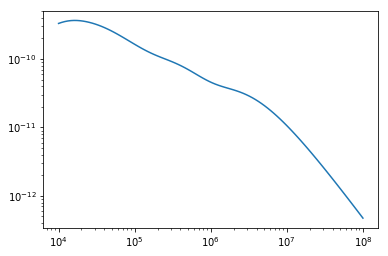

In [146]:
plt.plot(temperature,alpha)
plt.xscale('log')
plt.yscale('log')

## Abundance Read Tests

In [25]:
abund_files = [file for file in os.listdir(os.path.join(fiasco.defaults['chianti_dbase_root'],'abundance')) 
               if file[0]!='.' and os.path.isfile(os.path.join(fiasco.defaults['chianti_dbase_root'],'abundance',file))]

In [26]:
abund_files += [os.path.join('version_3',file) for file in os.listdir(os.path.join(fiasco.defaults['chianti_dbase_root'],'abundance','version_3'))
                if file[0]!='.']

In [ ]:
failed_files = []
with ProgressBar(len(abund_files),ipython_widget=True) as progress:
    for ef in abund_files:
        parser = fiasco.io.Parser(ef)
        try:
            df = parser.parse()
        except:
            print('Parse failed for file {}'.format(ef))
            failed_files.append(ef)
        progress.update()
print('failure percentage: {}'.format(len(failed_files)/len(abund_files)*100))

In [27]:
parser = fiasco.io.Parser(abund_files[0])
df = parser.parse()
print(df)
print('---Metadata---')
for key in df.meta:
    print('{}:{}'.format(key,df.meta[key]))

atomic number abundance relative to H element
                                             
------------- ----------------------- -------
            1                     1.0       H
            2     0.08511380382023759      He
            6   0.0003311311214825908       C
            7   9.120108393559096e-05       N
            8   0.0006606934480075965       O
            9   3.981071705534969e-08       F
           10   8.317637711026709e-05      Ne
           11   1.778279410038923e-06      Na
           12  2.6302679918953814e-05      Mg
           13  2.4547089156850284e-06      Al
          ...                     ...     ...
           21  1.6595869074375631e-09      Sc
           22  1.3489628825916533e-07      Ti
           23   2.511886431509582e-08       V
           24   7.079457843841374e-07      Cr
           25  2.5118864315095823e-07      Mn
           26  3.9810717055349695e-05      Fe
           27  1.2589254117941662e-07      Co
           28  1.9952623149688787e

## Ioneq Read Tests

In [28]:
ioneq_files = [os.path.join('deprecated',file) 
               for file in os.listdir(os.path.join(fiasco.defaults['chianti_dbase_root'],'ioneq','deprecated'))]
ioneq_files += ['chianti.ioneq']

In [ ]:
failed_files = []
with ProgressBar(len(ioneq_files),ipython_widget=True) as progress:
    for ef in ioneq_files:
        parser = fiasco.io.Parser(ef)
        try:
            df = parser.parse()
        except:
            print('Parse failed for file {}'.format(ef))
            failed_files.append(ef)
        progress.update()
print('failure percentage: {}'.format(len(failed_files)/len(ioneq_files)*100))

In [29]:
parser = fiasco.io.Parser(ioneq_files[-1])
df = parser.parse()
print(df)
print('---Metadata---')
for key in df.meta:
    print('{}:{}'.format(key,df.meta[key]))

atomic number ion    temperature [101]    ionization fraction [101]
                             K                                     
------------- --- ----------------------- -------------------------
            1   1 10000.0 .. 1000000000.0       0.9983 .. 1.664e-10
            1   2 10000.0 .. 1000000000.0           0.001693 .. 1.0
            2   1 10000.0 .. 1000000000.0          1.0 .. 5.607e-17
            2   2 10000.0 .. 1000000000.0    1.904e-09 .. 1.093e-08
            2   3 10000.0 .. 1000000000.0          1.592e-34 .. 1.0
            3   1 10000.0 .. 1000000000.0     0.004061 .. 1.014e-23
            3   2 10000.0 .. 1000000000.0        0.9959 .. 1.52e-14
            3   3 10000.0 .. 1000000000.0           0.0 .. 1.46e-07
            3   4 10000.0 .. 1000000000.0                0.0 .. 1.0
            4   1 10000.0 .. 1000000000.0             0.9577 .. 0.0
          ... ...                     ...                       ...
           30  22 10000.0 .. 1000000000.0       

## Ip Read Tests

In [30]:
parser = fiasco.io.Parser('chianti.ip')
df = parser.parse()
print(df)
print('---Metadata---')
for key in df.meta:
    print('{}:{}'.format(key,df.meta[key]))

atomic number ion ionization potential
                         1 / cm       
------------- --- --------------------
            1   1          109678.7737
            2   1         198310.77227
            2   2          438908.8863
            3   1             43487.15
            3   2             610079.0
            3   3           987661.027
            4   1             75192.64
            4   2            146882.86
            4   3            1241242.0
            4   4          1756018.824
          ... ...                  ...
           30  21           14890000.0
           30  22           15860000.0
           30  23           16810000.0
           30  24           18020000.0
           30  25           19040000.0
           30  26           20110000.0
           30  27           21490000.0
           30  28           22450000.0
           30  29           95696100.0
           30  30           99921800.0
Length = 465 rows
---Metadata---
footer:%filename: chianti.ip
%i

## Auto-registry
Note that if we want to parse a new kind of file, it is just a matter of subclassing the generic parser and naming it using the convention 

```
{File extension}Parser
``` 

with the file extension capitalized. You can also bypass all of this machinery by passing in a custom parser using the `custom_parser` kwarg to `Parser`

In [39]:
class JpegParser(fiasco.io.GenericParser):
    def __init__(self,*args,**kwargs):
        print('A custom registered parser')
    def parse(self):
        print('Nothing to parse here')

In [40]:
fiasco.io.Parser('hello.jpeg').parse()

A custom registered parser
Nothing to parse here
